# Scraper

Script to scrape reviews and ratings of a movie / tvshow from IMDB.

In [150]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

Configuration

In [25]:
DATA_PATH = 'data.tsv'

Read tsv

In [26]:
df = pd.read_csv(DATA_PATH, sep = '\t')

In [27]:
df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1924
1,tt0000002,5.8,260
2,tt0000003,6.5,1736
3,tt0000004,5.6,175
4,tt0000005,6.2,2551


Row count

In [68]:
len(df.index)

1252779

Randomly sample data

In [ ]:
sample_idxs = np.random.permutation(len(df.index))

## Data Mining

Mine data from the web and save to pickle file

In [114]:
SAMPLE_SIZE = 10000
SAVE_INTERVAL = 1000
REVIEWS_PER_MOVIE = 5
SAVE_LOCATION = './data/'

In [116]:
data = {}
count = 0
save_counter = 0
with tqdm(total=SAMPLE_SIZE) as pbar:
    for idx in sample_idxs:
        # check if exit loop
        if count >= SAMPLE_SIZE:
            break
        # get metadata
        metadata = df.iloc[idx]
        tid, rating = metadata[0], metadata[1]
        # scrape reviews
        raw = None
        try:
            raw = requests.get(f'https://www.imdb.com/title/{tid}/reviews?ref_=tt_urv')
        except:
            print(f'Error while mining {tid} ...')
            continue
        soup = BeautifulSoup(raw.text, 'html.parser')
        r_text = []
        for i, r_div in enumerate(soup.findAll('div', {'class': ['content']})):
            review = r_div.find(class_ = 'text')
            if i >= REVIEWS_PER_MOVIE:
                break
            r_text.append(review.text)
        if len(r_text) == 0:
            # no review found, continue searching
            continue
        # store data
        data[tid] = (rating, ' '.join(r_text))
        count += 1
        pbar.update(1)
        # save data if interval
        if count % SAVE_INTERVAL == 0:
            # dump data
            print('saving checkpoint...')
            with open(f'{SAVE_LOCATION}ratings_{save_counter}.pkl', 'wb') as f:
                pickle.dump(data, f)
            save_counter += 1
            # clear data
            data.clear()
# save data
print('done')

 10%|███████▌                                                                    | 997/10000 [26:31<3:31:03,  1.41s/it]

Error while mining tt6324022 ...


 10%|███████▌                                                                   | 1000/10000 [26:39<5:11:18,  2.08s/it]

saving checkpoint...


 10%|███████▌                                                                   | 1002/10000 [26:40<3:28:51,  1.39s/it]

Error while mining tt5340984 ...


 10%|███████▌                                                                   | 1007/10000 [26:48<3:47:51,  1.52s/it]

Error while mining tt1725272 ...
Error while mining tt0230376 ...


 20%|███████████████                                                            | 2000/10000 [53:31<4:01:23,  1.81s/it]

saving checkpoint...


 30%|█████████████████████▉                                                   | 3000/10000 [1:20:19<2:06:27,  1.08s/it]

saving checkpoint...


 40%|█████████████████████████████▏                                           | 4000/10000 [1:46:50<1:54:25,  1.14s/it]

saving checkpoint...


 44%|████████████████████████████████▏                                        | 4409/10000 [1:57:57<1:37:53,  1.05s/it]

Error while mining tt7237026 ...
Error while mining tt7854338 ...


 44%|████████████████████████████████▏                                        | 4413/10000 [1:58:05<2:57:46,  1.91s/it]

Error while mining tt0198356 ...


 50%|████████████████████████████████████▌                                    | 5000/10000 [2:12:51<1:02:49,  1.33it/s]

saving checkpoint...


 60%|███████████████████████████████████████████▊                             | 6000/10000 [2:39:55<3:05:20,  2.78s/it]

saving checkpoint...


 64%|██████████████████████████████████████████████▋                          | 6404/10000 [2:50:30<1:42:57,  1.72s/it]

Error while mining tt0565115 ...


 70%|███████████████████████████████████████████████████                      | 7000/10000 [3:06:16<1:36:12,  1.92s/it]

saving checkpoint...


 80%|████████████████████████████████████████████████████████████               | 8000/10000 [3:33:09<44:11,  1.33s/it]

saving checkpoint...


 80%|████████████████████████████████████████████████████████████▏              | 8028/10000 [3:33:48<46:15,  1.41s/it]

Error while mining tt10693212 ...


 80%|████████████████████████████████████████████████████████████▏              | 8029/10000 [3:33:49<48:15,  1.47s/it]

Error while mining tt2099152 ...


 80%|████████████████████████████████████████████████████████████▏              | 8030/10000 [3:33:51<56:20,  1.72s/it]

Error while mining tt6851704 ...


 80%|██████████████████████████████████████████████████████████▋              | 8031/10000 [3:33:54<1:08:40,  2.09s/it]

Error while mining tt2457304 ...


 80%|██████████████████████████████████████████████████████████▋              | 8032/10000 [3:33:59<1:35:25,  2.91s/it]

Error while mining tt3215234 ...


 80%|████████████████████████████████████████████████████████████▎              | 8036/10000 [3:34:04<57:29,  1.76s/it]

Error while mining tt8249034 ...


 90%|███████████████████████████████████████████████████████████████████▌       | 9000/10000 [3:58:52<17:35,  1.06s/it]

saving checkpoint...


 95%|███████████████████████████████████████████████████████████████████████    | 9477/10000 [4:11:06<10:17,  1.18s/it]

Error while mining tt5021510 ...


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [4:24:10<00:00,  1.59s/it]

saving checkpoint...
done


Train/Dev/Test Split

In [144]:
ratio = [8,1,1]

ratio = np.cumsum(np.array(ratio))
names = ['train', 'dev', 'test']
ratings = {}
mode = 0
for i in range(SAMPLE_SIZE // SAVE_INTERVAL):
    with open(f'{SAVE_LOCATION}ratings_{i}.pkl', 'rb') as handle:
        temp = pickle.load(handle)
        # merge
        ratings = ratings | temp
    # dump file
    if i == ratio[mode] - 1:
        with open(f'{SAVE_LOCATION}processed/data_{names[mode]}.pkl', 'wb') as f:
            pickle.dump(ratings, f)
        mode += 1
        ratings.clear()

## Data visualization

Load pickled data

In [145]:
train_data = None
dev_data = None
test_data = None
with open(f'{SAVE_LOCATION}processed/data_train.pkl', 'rb') as handle:
    train_data = pickle.load(handle)
with open(f'{SAVE_LOCATION}processed/data_dev.pkl', 'rb') as handle:
    dev_data = pickle.load(handle)
with open(f'{SAVE_LOCATION}processed/data_test.pkl', 'rb') as handle:
    test_data = pickle.load(handle)

Size of dataset

In [147]:
print(f'Dataset Size: train = {len(train_data)}, dev = {len(dev_data)}, test = {len(test_data)}')

Dataset Size: train = 8000, dev = 1000, test = 1000


Ratings distribution

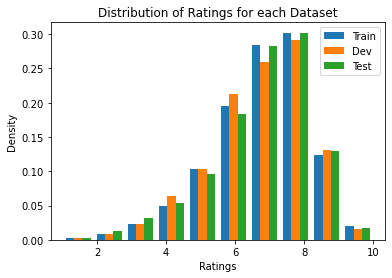

In [155]:
train_scores = []
for k, v in train_data.items():
    train_scores.append(v[0])
dev_scores = []
for k, v in dev_data.items():
    dev_scores.append(v[0])
test_scores = []
for k, v in test_data.items():
    test_scores.append(v[0])
dist = [np.array(train_scores), np.array(dev_scores), np.array(test_scores)]
plt.hist(dist, density = True, label=['Train', 'Dev', 'Test'])
plt.title('Distribution of Ratings for each Dataset')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.show()